In [1]:
using LazySets

┌ Info: Recompiling stale cache file C:\Users\dgsl\.julia\compiled\v1.1\LazySets\NjrGc.ji for LazySets [b4f0291d-fe17-52bc-9479-3d1a343d9043]
└ @ Base loading.jl:1184


In [20]:
using LazySets: to_negative_vector, center
function minkowski_difference(P::Zonotope{N}, Q::Zonotope{N}) where {N<:Real}
    @assert dim(P) == dim(Q)
    Zint = Zonotope(center(P), genmat(P))
    for i = 1:ngens(Q)
        g = genmat(Q)[i, :]
        if !isempty(Zint)
            Zint = intersection(translate(Zint, g), translate(Zint, to_negative_vector(g)))
        else
            return Zint
        end
    end
    return convert(Zonotope{N}, Zint)
end

minkowski_difference (generic function with 1 method)

In [6]:
P = Zonotope([1., 1], [[1. 1]; [0. 1]; [1. 0]; [1. 1]]')
Q = Zonotope([1., 1], [[0. 0]; [0.5 0]; [0. 0.5]]')

Zonotope{Float64}([1.0, 1.0], [0.5 0.0; 0.0 0.5])

In [21]:
Z = minkowski_difference(P, Q)

MethodError: MethodError: Cannot `convert` an object of type HPolytope{Float64} to an object of type Zonotope{Float64}
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T at essentials.jl:154

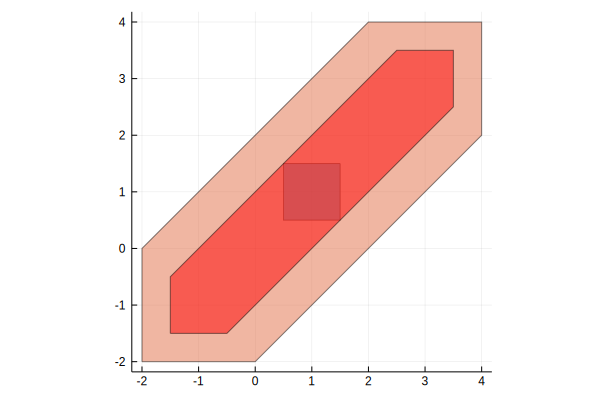

In [8]:
using Plots
plot(Q, ratio=1)
plot!(P)
plot!(Z, color=:red)